In [20]:
#Report

#Can I load it? Yes, it is in a csv format
#early questions:
#1: Are certain genres more likely to get better ratings?
#2: Are certain genres more likely to get better downloads?
#3: Is the common FEAR justified about whether charging for an app limits its adoption?

#Potential future research project: 
#1. If #3 is true, propose to understand the adoption speed over period of time between free apps and paid apps.
#Since there seems to be a relationship between paid apps having higher ratings, find out 
#what other factors could be at play

#2. On the low end (0-100,000 users), could a sudden plateau be due to a loss investment funding? How distributed is it?


#different variables/columns:
#App name
#Category
#Rating
#Size
#Installs
#Type (free or Paid)
#Price
#Content Rating
#Genre
#Last Updated
#Current Version
#Android Version

#Challenges:

#Unicode issues
#Realizing that my initial intuition for large bar graph for every category would not work.
#Turning 10,000,000+ category into a readable float
#the decisions i made  about why i created the bins the way i did in the right range
#boxplot and double bar graph choice
#Making the graphs more presentable with legend, lines, rotated words, etc.
#fixing the ticks to make the data in the bar graph illustrate a real difference
#"Reviews" started populating in the chart and boxplot at the end for no apparent reason

#outstanding:
#variable issue
#reviews are appearing?
#ticks

In [220]:
# 1 Ranked Category by Ratings. x is category. bar height is the mean. Dig in to bar graph stuff, 
# show the mean not count.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
order = fear.groupby('Category').aggregate(np.mean)
order.sort_values('Rating', ascending = False)

#Suddenly started showing reviews too....

,Rating,Reviews
Category,,
EVENTS,4.435556,2.515906e+03
EDUCATION,4.389032,2.538191e+05
ART_AND_DESIGN,4.358065,2.637600e+04
BOOKS_AND_REFERENCE,4.346067,9.506090e+04
PERSONALIZATION,4.335987,2.279238e+05
PARENTING,4.300000,1.597218e+04
GAME,4.286326,1.385859e+06
BEAUTY,4.278571,7.476226e+03
HEALTH_AND_FITNESS,4.277104,1.111253e+05


In [213]:
#2, Are some categories more likely to get more downloads?
#set up install variable. list all install variables, and associate with install variables i want
#try a histogram to get a sense of how the data is distributed
#the visualization of the count of the number of apps that are in each bin.

bar1 = fear.groupby('0+','1+','5+','10+','50+','100+','500+').count()


fear = pd.read_csv('googleplaystore.csv', encoding='latin')
order = bar1.aggregate(np.mean)
#order.sort_values('Install', ascending = False)

#--------
#0+
#1+
#5+
#10+
#50+
#100+
#500+
#---
#1,000+
#5,000+
#10,000+
#50,000+
#100,000+
#--
#500,000+
#1,000,000+
#5,000,000+
#10,000,000+
#--
#50,000,000+
#100,000,000+
#500,000,000+
#--
#1,000,000,000+

#install_one = fear['Install']

ValueError: No axis named 1+ for object type <class 'pandas.core.frame.DataFrame'>

In [209]:
#Ranked Category by Installs

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
order = bar1.aggregate(np.mean)
#order.sort_values('Install', ascending = False)

NameError: name 'bar1' is not defined

In [173]:
#3 pt 1 Free, mean

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
var2 = fear.loc[lambda df: fear['Type'] == 'Free', 'Rating']
free_mean = var2.mean()
var2.mean()

4.186202546163562

In [174]:
#3 pt 2 Free, median

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
var2 = fear.loc[lambda df: fear['Type'] == 'Free', 'Rating']
free_median = var2.median()
var2.median()

4.3

In [171]:
#3 pt 3 Paid, mean

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
var1 = fear.loc[lambda df: fear['Type'] == 'Paid', 'Rating']
paid_mean = var1.mean()
var1.mean()

4.266615146831529

In [190]:
#3 pt 4 Paid, median

fear = pd.read_csv('googleplaystore.csv', encoding='latin')
var1 = fear.loc[lambda df: fear['Type'] == 'Paid', 'Rating']
paid_median = var1.median()
var1.median()

4.4

In [ ]:
#3 boxplot and double bar graph for the visualization. it's a good idea to have 
#a summary of each visualization and use another visualization and summary to back it up.

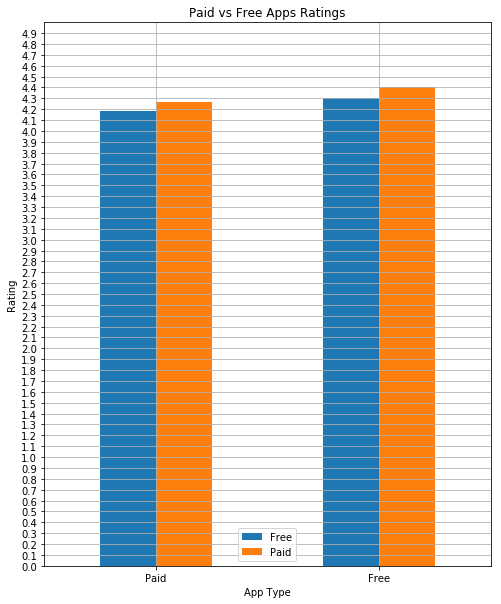

In [225]:
#double bar
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

paid = [paid_mean, paid_median]
free = [free_mean, free_median]
index = ['Paid', 'Free']
df = pd.DataFrame({'Paid': paid,'Free': free}, index=index) 
ax = df.plot.bar(figsize=(8,10),ylim=(0,5), alpha=1, width=.5, rot=0)

ax.set_title('Paid vs Free Apps Ratings')
ax.set_ylabel('Rating')
ax.set_xlabel('App Type')
#i'm setting axis from 0 - 5, and then spread every .1
ax.yaxis.set_ticks(np.arange(0, 5, 0.10))
plt.legend(['Free', 'Paid'], loc='lower center')
plt.grid()
plt.show()



In [223]:
#boxplot
fear = pd.read_csv('googleplaystore.csv', encoding='latin')
review = fear['Reviews']
bp1 = review.boxplot(meanline=True, showbox=False)
plt.show()
#Suddenly started showing reviews too....like above.

AttributeError: 'Series' object has no attribute 'boxplot'

Text(0,0.5,'Rating')

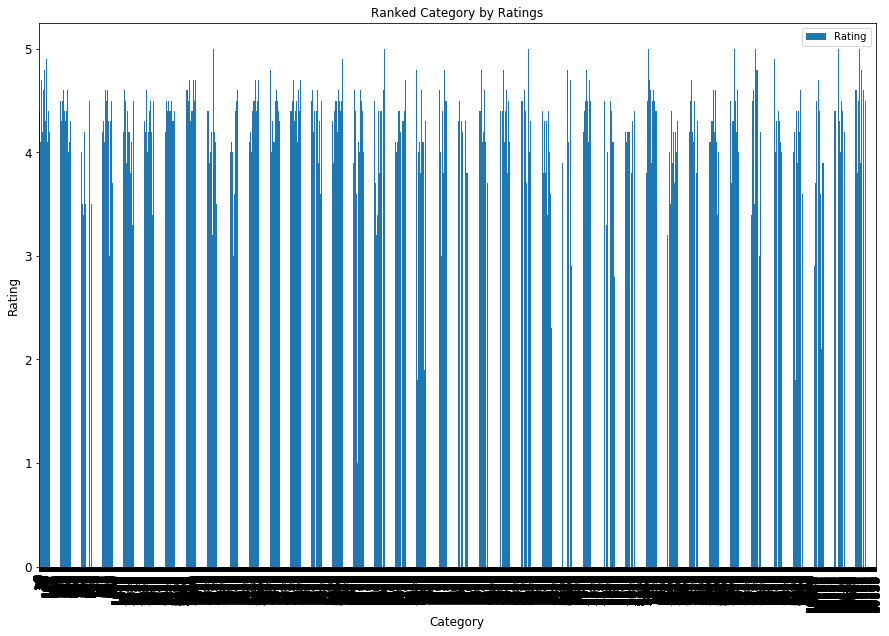

In [9]:
#No longer needed
ax = fear.plot(kind='bar', title ="Ranked Category by Ratings",figsize=(15,10),legend=True, fontsize=12)
plt.xticks(rotation=90)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("Rating",fontsize=12)
